In [63]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [64]:
run_path = '../runs/'
runs = os.listdir(run_path)
runs = sorted(runs)

results = {}
for run in runs:
    results[run] = pd.read_csv(run_path + run + '/log.csv')

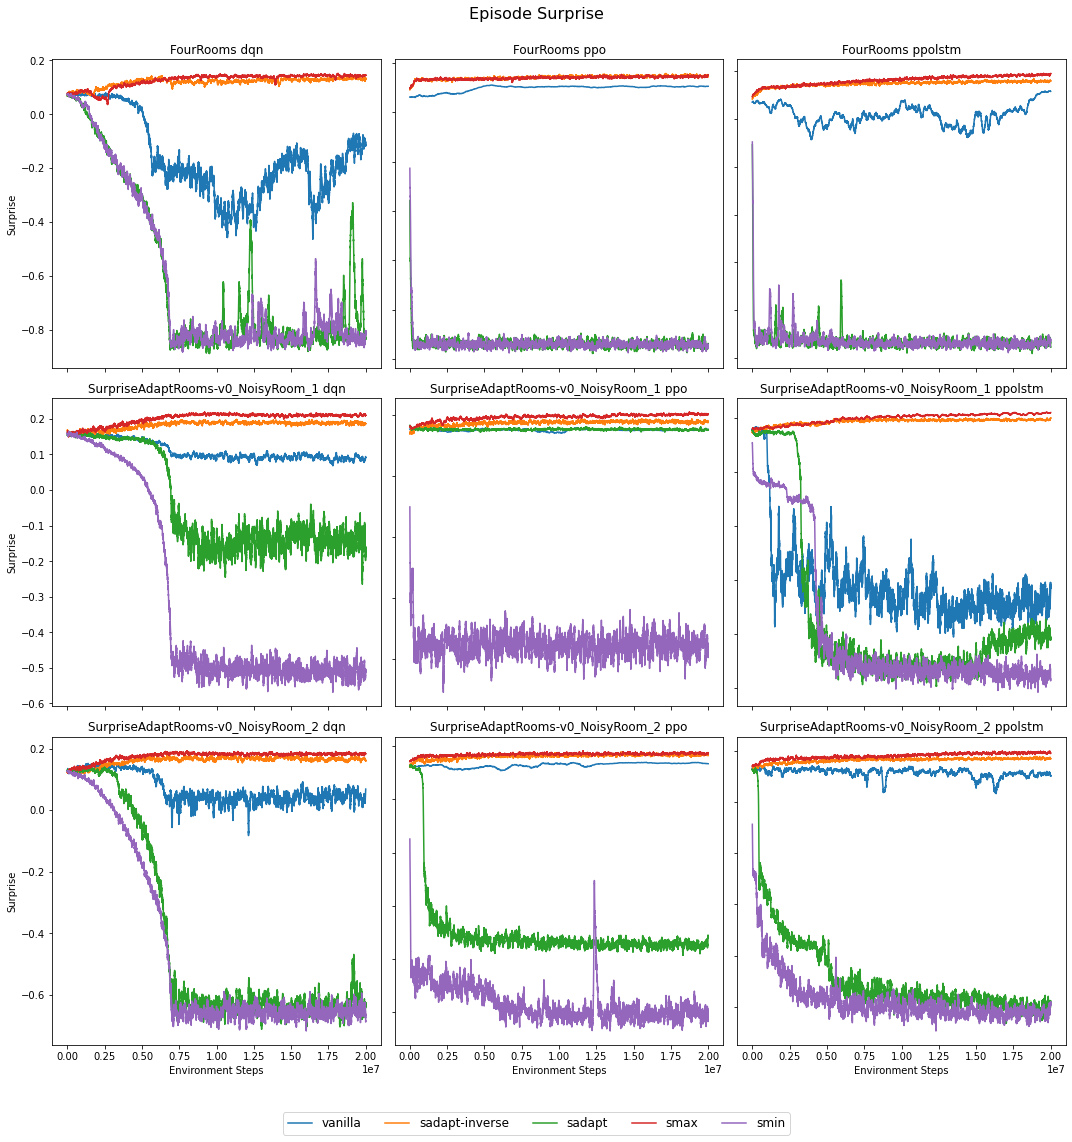

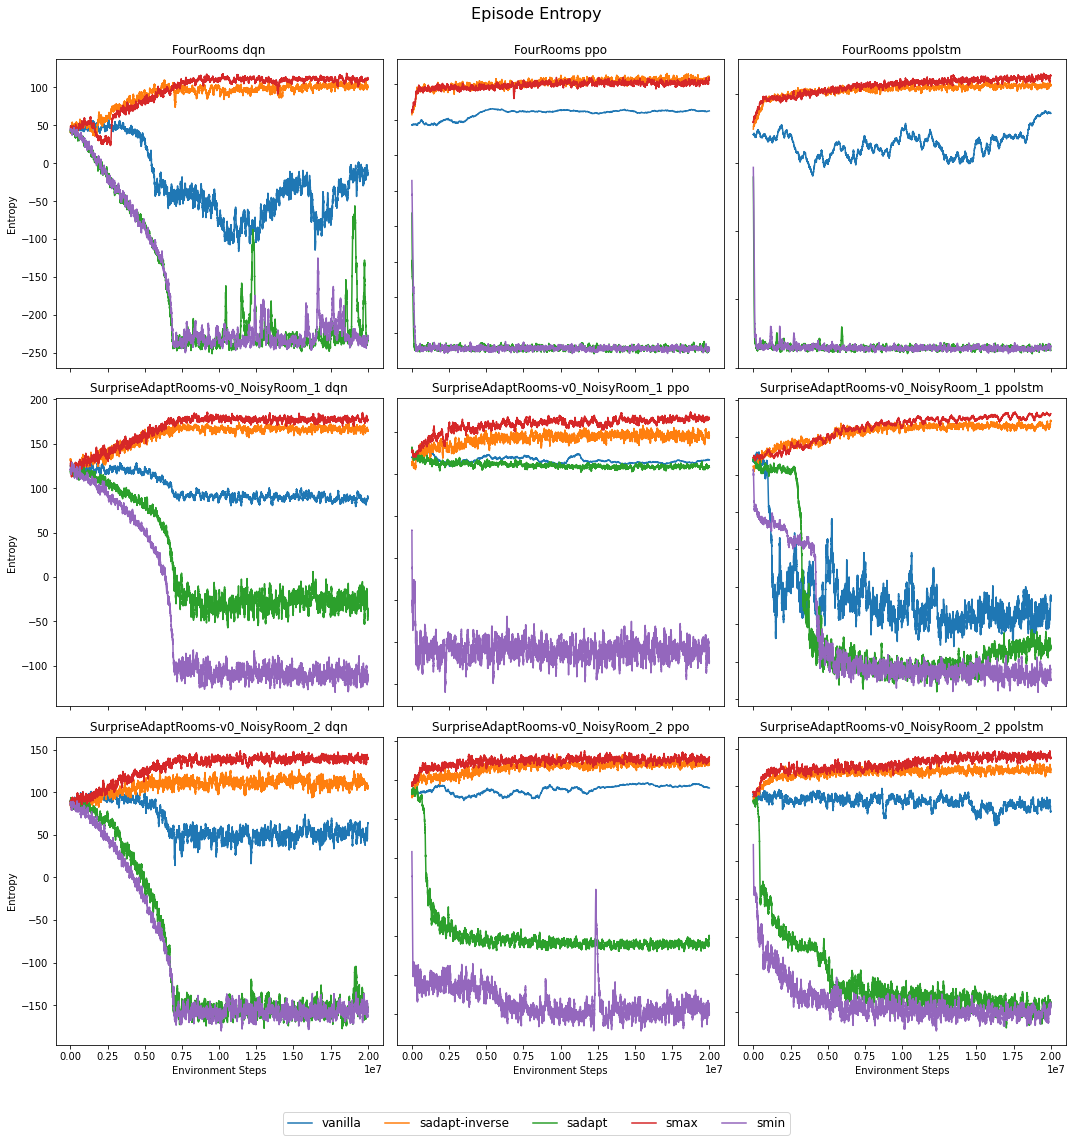

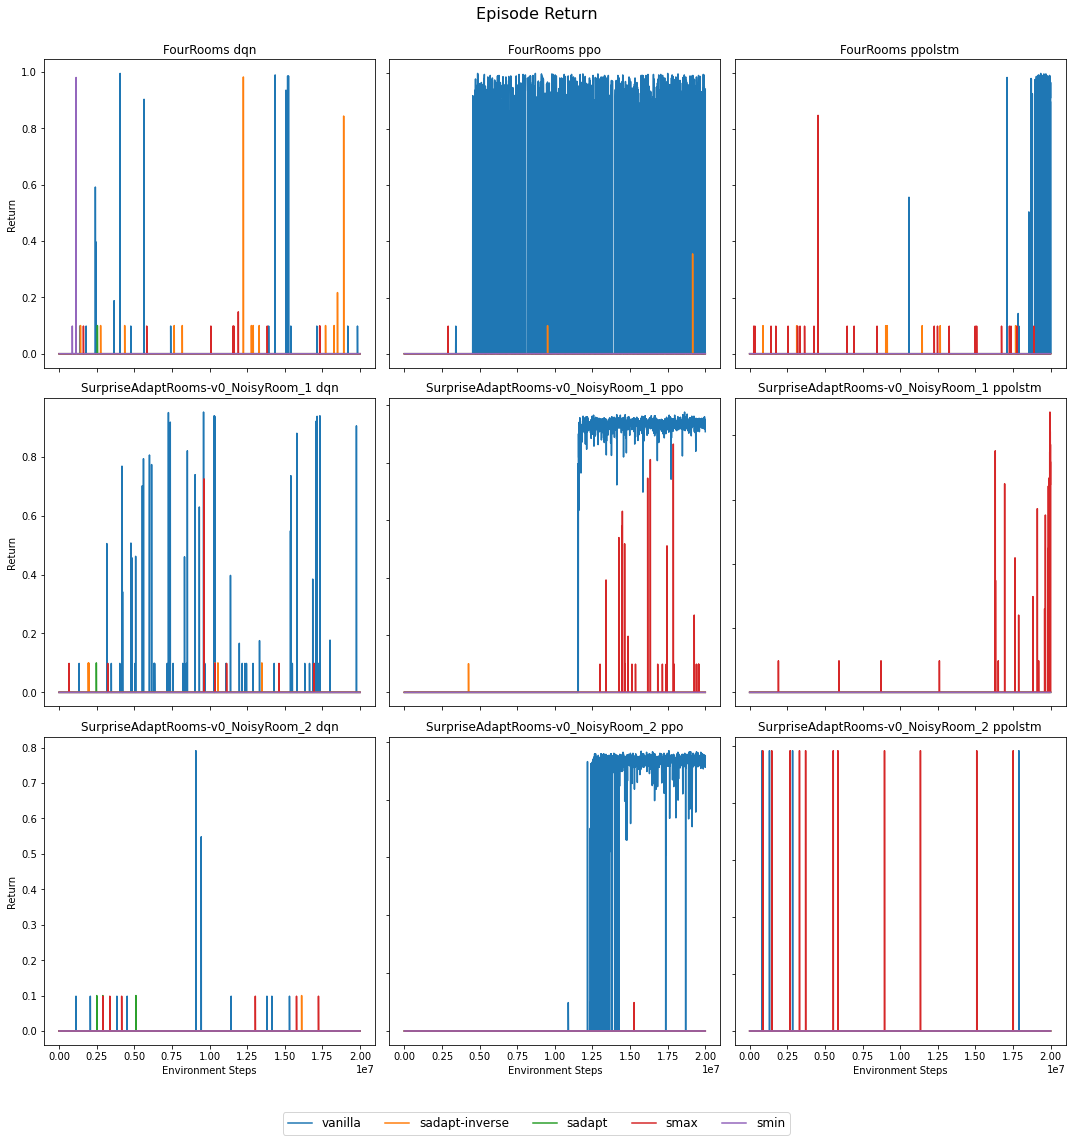

In [66]:
algo_names = ["dqn", "ppo", "ppolstm"]
env_names = ["FourRooms", "SurpriseAdaptRooms-v0_NoisyRoom_1", "SurpriseAdaptRooms-v0_NoisyRoom_2"]
metrics = ["ep_surprise", "ep_entropy", "ep_return"]


for metric in metrics:
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    for env_name in env_names:
        for algo_name in algo_names:
            title = env_name + " " + algo_name
            x_idx, y_idx = env_names.index(env_name), algo_names.index(algo_name) 
            axs[x_idx, y_idx].set_title(title)
            for run in runs:
                if algo_name == "ppo":
                    ban_lstm = True
                else:
                    ban_lstm = False
                
                if env_name in run and algo_name in run and (not ban_lstm or "lstm" not in run):
                    run_label = run
                    run_label = run_label.replace(env_name, "")
                    run_label = run_label.replace(algo_name, "")
                    run_label = run_label.replace("noExtrinsic", "")
                    run_label = run_label.replace("s1", "")
                    run_label = run_label.replace("_", "")
                    run_label = run_label.replace("none", "vanilla")

                    y = results[run][metric]                    
                    if metric != "ep_return":
                        y = np.convolve(y, np.ones(100), 'valid') / 100
                    
                    x = np.linspace(0, 20000000, len(y))
                    axs[x_idx, y_idx].plot(x, y, label=run_label)

    # plot only x axis labels on bottom row
    for ax in axs.flat:
        ax.set(xlabel='Environment Steps', ylabel=metric.split("_")[1].capitalize())
        ax.label_outer()

    # plot only y axis labels on left column
    for ax in axs.flat:
        ax.label_outer()

    # set title for entire figure
    fig.suptitle(f'Episode {metric.split("_")[1].capitalize()}', fontsize=16, y=1)

    handles, labels = axs[0, 0].get_legend_handles_labels() 
    fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05), fancybox=True, fontsize=12)
    plt.tight_layout()

    plt.show()